# TRANSFORMER

In [2]:
import torch
import torch.nn as nn 
import math

## 0. Encoder Part of Transformer

### 0.1 InputEmbeddings

In [3]:
class InputEmbeddings(nn.Module):
    
    def __init__(self, d_model:int, vocab_size:int ) -> None:
        super().__init__()
        self.d_model = d_model   # d_model which represents the dimension of the model (i.e., the size of the word embeddings).
        self.vocab_size = vocab_size  # vocab_size which represents the size of the vocabulary. For instance, the GPT-3 model by OpenAI has a vocabulary size of approximately 14,735,746 words
        self.embedding = nn.Embedding(vocab_size, d_model)  # size of the word and vocab size, do the embedding 
        
        
    def forward(self, x):
        return self.embedding(x) * math.sqrt(self.d_model) # The embeddings are scaled by multiplying with the square root of d_model as recommended in the "Attention is All You Need" paper.
        

This piece of code defines a class named InputEmbeddings that inherits from nn.Module. nn.Module is the base class for all neural network modules in PyTorch, a popular deep learning library. This class, InputEmbeddings, represents an embedding layer in a neural network model.

Explanation of the Code

Let's break down the methods present in the class:

__init__(self, d_model:int, vocab_size:int ) -> None:

This is the constructor method for the class which initializes the instance. It takes three arguments:

self which represents the instance of the class.
d_model which represents the dimension of the model (i.e., the size of the word embeddings).
vocab_size which represents the size of the vocabulary.

In the body of the constructor, it calls the constructor of the parent class (nn.Module) with super().__init__(), stores the provided d_model and vocab_size into instance variables, and then initializes an embedding layer using PyTorch's nn.Embedding. nn.Embedding is a simple lookup table that stores embeddings of a fixed dictionary and size. The input to the module is a list of indices, and the output is the corresponding word embeddings.

forward(self, x):

This method defines the forward pass of the embedding layer. In other words, it describes how the module processes input data (x). It returns the input data passed through the embedding layer and scales the embedding according to the paper's recommendation by multiplying it by the square root of d_model. The scaling is a trick the authors of the "Attention is All You Need" paper use to get the model to learn better.

Key Points

InputEmbeddings is a class that defines an embedding layer in a neural network.
It inherits from the nn.Module class, the base class for all neural network modules in PyTorch.
The nn.Embedding layer is a simple lookup table that stores embeddings of a fixed dictionary and size.
The forward method defines how the module processes input data.
The embeddings are scaled by multiplying with the square root of d_model as recommended in the "Attention is All You Need" paper.

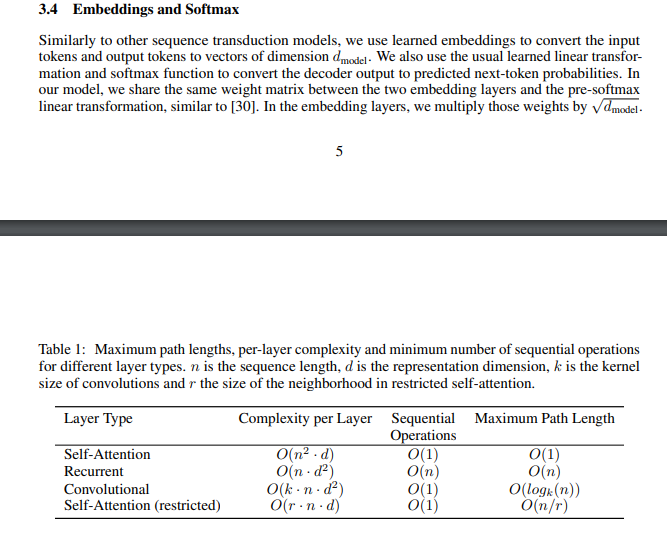
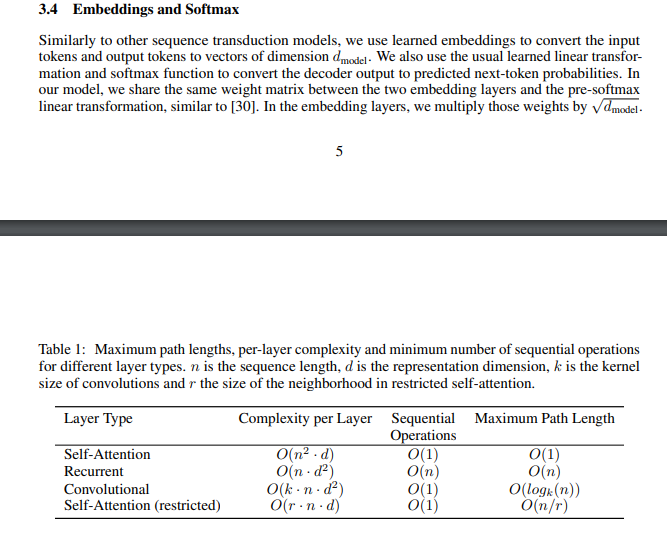

### 0.2 PositionalEncoding

In [5]:
class PositionalEncoding(nn.Module):
    
    def __init__(self, 
                 d_model:int,  # this is the size of the vector that the positonal encoding should be 
                 seq_len:int,   # this is the maximum of the sentences because we need to create  one vector for each position
                 dropout:float  # dropout is to make the model less overfit
                 ) -> None:
        super().__init__()
        self.d_model = d_model
        self.seq_len = seq_len # seq_len(5) -> code will return the sequence 1, 2, 3, 4, 5. The seq_len function takes an integer argument n and generates a sequence of integers from 1 up to n. If n is less than or equal to 0, seq_len returns an empty integer vector.
        
        # The line `self.dropout = nn.Dropout(dropout)` in the provided code defines a dropout layer in the `PositionalEncoding` class. 
        # Dropout is a regularization technique commonly used in neural networks to prevent overfitting. It randomly sets a fraction of the input units to zero during training, which helps to prevent the co-adaptation of neurons and encourages the network to learn more robust and generalizable features.
        # In the code, `nn.Dropout(dropout)` creates a dropout layer with a specified dropout rate. The `dropout` argument is a float value between 0 and 1, representing the probability of setting an input unit to zero. For example, if `dropout` is set to 0.5, then during training, each input unit will be set to zero with a 50% probability.
        # By assigning the dropout layer to `self.dropout`, the `PositionalEncoding` class can apply dropout to the input tensor `x` in the `forward` method using `self.dropout(x)`.
        # In summary, the line `self.dropout = nn.Dropout(dropout)` creates a dropout layer with a specified dropout rate in the `PositionalEncoding` class, which helps to regularize the model and prevent overfitting.
        self.dropout = nn.Dropout(dropout) 
        
        # create a matrix of shape (seq_len, d_model)
        pe = torch.zeros(seq_len, d_model) 
        
        # create a vector of shape (seq_len)
        # first we create a vector called the positon that will represent the positon of of the word inside the sentence 
        # and this vector can go from 0 to sequence length minus 1
        # .unsqueeze(1) ->  we are creating a tensor of shape sequence length one 
        position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
        
        # create a vector of shape (d_model)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        # Apply sine to even indices 
        # : -> every word position will have the sign 
        # 0 :: 2 -> but only the even dimension, starting from zero up to the end and going forward by two means from zero then the number two then the number four etc. 
        pe[:, 0::2] = torch.sin(position * div_term)
        
        # Apply cosine to odd indices 
        # 1::2 -> in this case start from one and go forward by two it means one three five etc.
        pe[:, 1::2] = torch.cos(position * div_term)
        
        # Add to batch dimension to the positional encoding 
        # and then we need to add the batch dimension to this tensor so that we can apply it to the whole sentences so to all the batch  of the sentences because now the shape length of the d_model but we will have a batch of sentences   
        pe = pe.unsqueeze(0)
        
        # Register the positional encoding as a buffer 
        # finaly we will register the value of buffer of the module 
        # so basically when you have a tensor that you want to keep inside the module not as a parameter learned 
        # but you want it to be saved when you save the file of the model you should register it as a buffer this way the tensor will be saved in the file along with the state of the model 
        self.register_buffer('pe', pe)
        
        
    def forward(self, x):
        #(self.pe[:, :x.shape[1], :]),  pe -> positon encoding of this particular santence 
        # requires_grad_(False) -> and we also tell the model that we don't want to learn this positional encoding because 
        # they are fixed they will always be the same they are not learned along the training process 
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        
        # and then apply the dropout 
        return self.dropout(x)

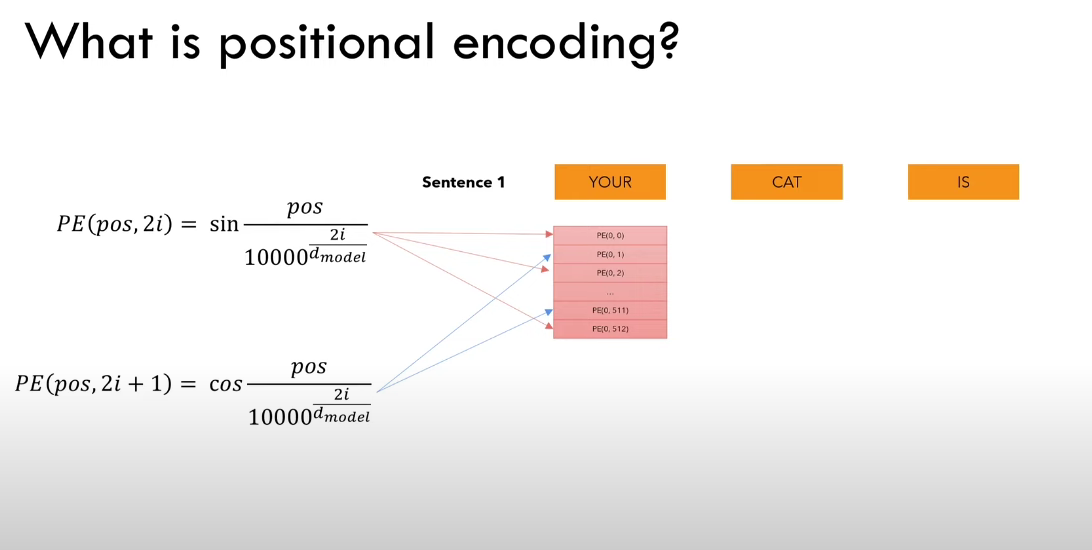

        
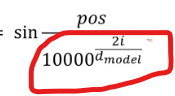

        position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)

        
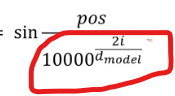

        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        
        
        
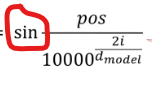

        pe[:, 0::2] = torch.sin(position * div_term)
        
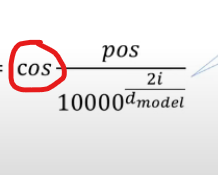

        pe[:, 1::2] = torch.cos(position * div_term)






In [7]:
import torch 

seq_len = 5 
d_model = 10 

pe = torch.zeros(seq_len, d_model)
print(pe)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [14]:
seq_len = 5 

position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
print(position)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])


In this example, seq_len is set to 5 and d_model is set to 10. The torch.zeros function creates a tensor with the specified shape (seq_len, d_model) and fills it with zeros. The resulting tensor pe is then printed to the console.

In summary, the example demonstrates how the code pe = torch.zeros(seq_len, d_model) can be used to create a tensor filled with zeros of a specified shape using the PyTorch library in Python.

The code `position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)` in Python using the PyTorch library creates a tensor `position` that represents the positions of elements in a sequence.

Here's a breakdown of the code:

- `torch.arange(0, seq_len, dtype=torch.float)`: This line generates a 1-dimensional tensor containing a sequence of numbers from 0 to `seq_len - 1`. The `torch.arange` function takes three arguments: the start value (0 in this case), the end value (`seq_len`), and the data type (`torch.float` in this case). It returns a tensor with the specified range of values.

- `.unsqueeze(1)`: This method call adds a new dimension of size 1 to the tensor. The `unsqueeze` function takes an argument `dim` that specifies the position where the new dimension should be inserted. In this case, `dim=1` indicates that the new dimension should be inserted as the second dimension of the tensor.

By combining these two operations, the code creates a tensor `position` that represents the positions of elements in a sequence. The tensor has a shape of `(seq_len, 1)`.

Here's an example of using the code:

```python
import torch

seq_len = 5

position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
print(position)
```

The output will be a tensor representing the positions of elements in a sequence:

```
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
```

In this example, `seq_len` is set to 5. The code generates a tensor `position` with values ranging from 0 to 4, representing the positions of elements in a sequence. The resulting tensor is then printed to the console.

In summary, the code `position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)` creates a tensor that represents the positions of elements in a sequence. The tensor has a shape of `(seq_len, 1)`.

In [6]:
# div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

a = torch.arange(0, 10, 2).float() * (-math.log(10000.0) / 10)
print(a)


tensor([-0.0000, -1.8421, -3.6841, -5.5262, -7.3683])


Certainly! Let's break down the code snippet:

1. `torch.arange(0, d_model, 2)` creates a 1-D tensor with values starting from 0, incrementing by 2, and stopping before reaching `d_model`. The `torch.arange()` function generates a sequence of numbers, similar to the built-in `range()` function in Python. The resulting tensor contains values like `[0, 2, 4, 6, ...]`.

2. `(-math.log(10000.0) / d_model)` calculates the value of the exponential decay term. Here:
   - `math.log(10000.0)` computes the natural logarithm of 10000.
   - `d_model` represents a model dimension (usually associated with neural network architectures like Transformers).
   - The negative sign indicates that we're taking the reciprocal of the exponential term.

3. `torch.exp(...)` computes the element-wise exponential of the tensor obtained in step 2. This operation raises the base of the natural logarithm (e) to the power of each element in the tensor.

In summary, `div_term` is a tensor containing the exponential decay factors used in positional encodings for Transformer-based models. These factors help introduce positional information into the model's input embeddings, allowing it to handle sequences effectively. The specific use case depends on the context of your code. If you're working with Transformers or similar architectures, this term is crucial for positional encoding.



The `register_buffer` method in PyTorch is used to add a buffer to a neural network module. Buffers are typically used to store auxiliary information that should not be considered as model parameters. Here are the key points about `register_buffer`:

1. **Purpose**:
   - Buffers are part of the module's state but are not considered trainable parameters.
   - They are useful for storing non-learnable quantities, such as running statistics in Batch Normalization layers or other intermediate values.
   - Unlike parameters, buffers are not updated during training.

2. **Syntax**:
   ```python
   self.register_buffer(name, tensor, persistent=True)
   ```
   - `name`: A string representing the name of the buffer.
   - `tensor`: The tensor to be registered as a buffer.
   - `persistent`: A boolean indicating whether the buffer should be saved alongside the model when serialized (default is `True`).

3. **Example**:
   Suppose you have a custom module with a buffer named `'pe'`:
   ```python
   class MyModule(nn.Module):
       def __init__(self):
           super().__init__()
           # Create a buffer 'pe' (e.g., for positional encodings)
           self.register_buffer('pe', pe)

       def forward(self, x):
           # Use the buffer 'pe' in your forward pass
           # ...
           return output
   ```

4. **Use Cases**:
   - Common use cases include storing moving averages (e.g., in BatchNorm), precomputed embeddings, or other fixed values needed during inference.
   - Buffers are automatically moved to the same device as the module.

Remember that buffers are not optimized during training, but they are essential for maintaining state within the module. If you have quantities that should be part of the model's state but not updated by the optimizer, consider using `register_buffer`. ¹⁴



Certainly! Let's explore an example of auxiliary information in the context of **image recognition**.

Suppose we have a deep learning model that identifies different types of fruits in images. The primary information for the model is the raw pixel data of the image itself. However, auxiliary information can significantly improve the accuracy of the fruit recognition task:

1. **Auxiliary Information**:
   - **Color Histograms**: We can compute histograms of color distribution (e.g., RGB values) within the image. These histograms provide additional context about the dominant colors present in the fruit.
   - **Texture Features**: Extracting texture features (such as Haralick features or Gabor filters) from the image can help distinguish between smooth-skinned fruits (like apples) and textured fruits (like pineapples).
   - **Shape Descriptors**: Auxiliary shape descriptors (e.g., circularity, elongation) can help differentiate round fruits (like oranges) from elongated ones (like bananas).
   - **Metadata**: If available, metadata about the image (e.g., location, lighting conditions, camera type) can provide context that aids in recognition.

2. **How It Works**:
   - During training, the model learns to combine both the raw pixel data and the auxiliary features to make accurate predictions.
   - For example, if the model encounters an image of a yellow, round fruit with a smooth texture, it can use the color histogram, shape descriptors, and texture features to narrow down the possibilities (e.g., it's likely an orange).

3. **Benefits**:
   - Improved Robustness: Auxiliary information makes the model more robust to variations in lighting, background, and image quality.
   - Generalization: By incorporating shape and texture features, the model can generalize better to unseen fruits.

Remember that auxiliary information varies depending on the specific task and domain. In this example, we focused on image recognition, but similar principles apply to other fields as well. If you'd like more examples or have any other questions, feel free to ask! 😊

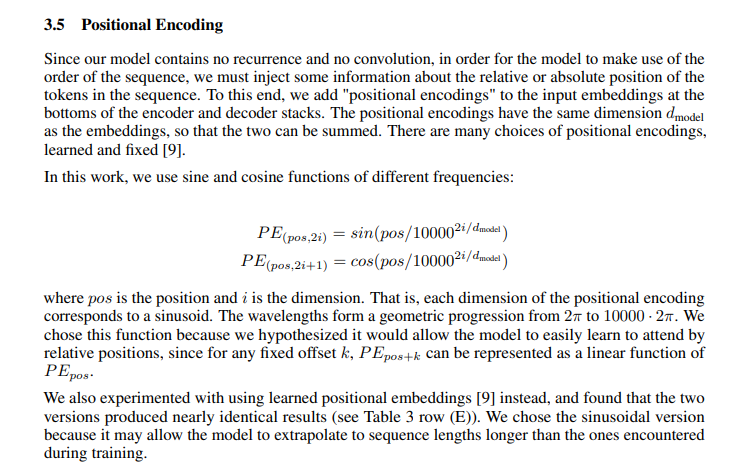

### 0.3 Normalization

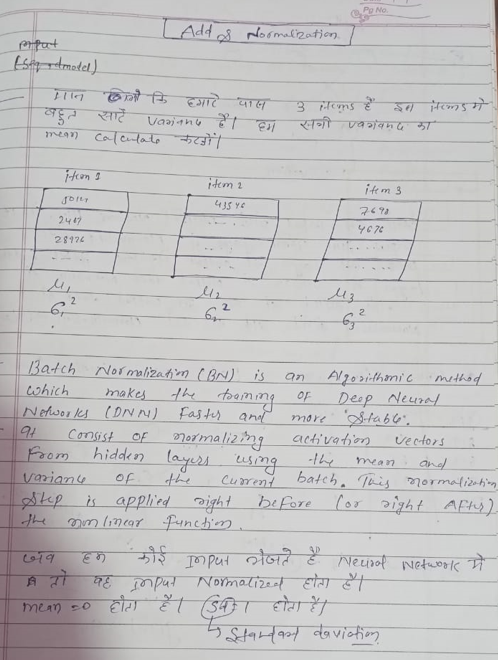
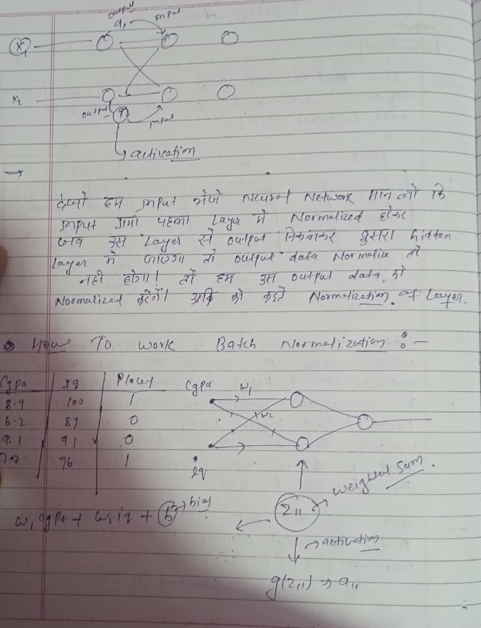
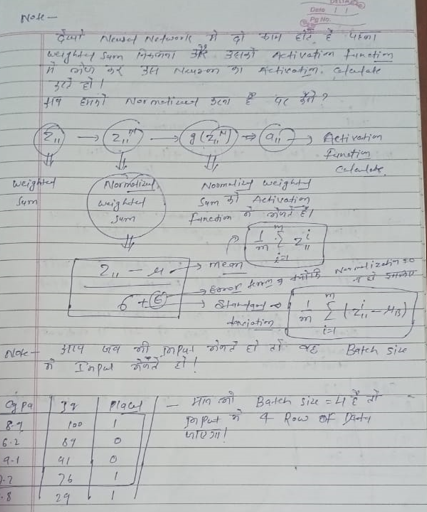
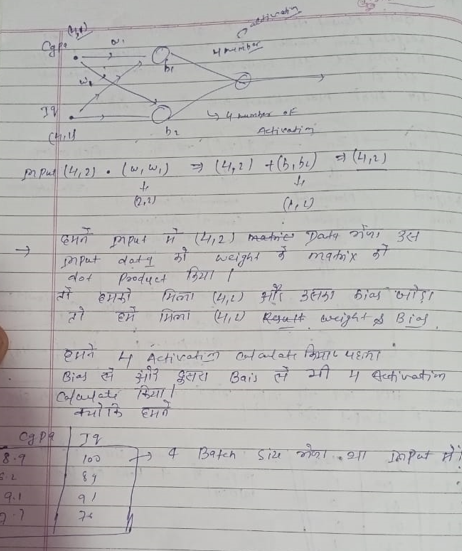
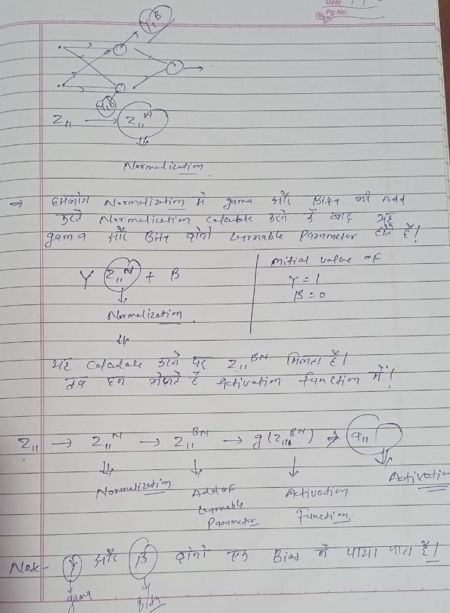

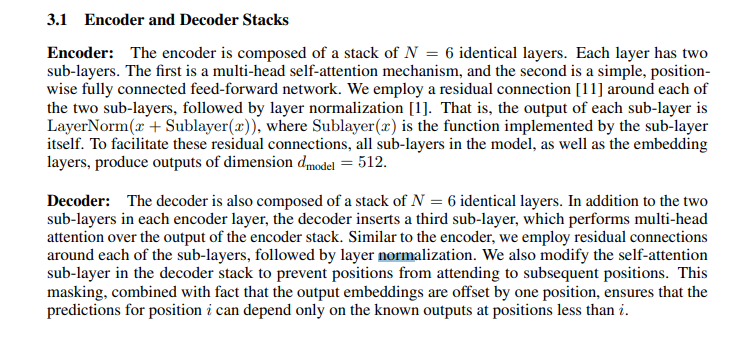

In [3]:
class LayerNormalization(nn.Module):
    
    def __init__(self, 
                 features:int,
                 eps:float=10**-6  # this denominator if sigma 
                 ) -> None:
        super().__init__()
        self.eps = eps 
        self.alpha = nn.Parameter(torch.ones(features))  # alpha is a learnable parameter 
        self.bias = nn.Parameter(torch.zeros(features))  # bias is a learnable parameter 
        
        def forward(self, x):
            
            # keep the dimension for broadcasting
            mean = x.mean(dim = -1,   # last dimension 
                          keepdim = True)  # thet usually the mean cancels the dimension to which it is applied but we want to keep it
            
            # keep the dimension for broadcasting 
            std = x.std(dim = -1, keepdim = True)
            
            # eps is to prevent dividing by zero or when std is very small 
            return self.alpha * (x - mean) / (std + self.eps) + self.bias
    

### 0.4 FeedForward Layer

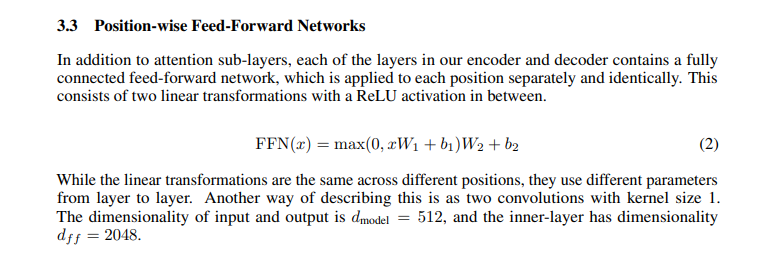
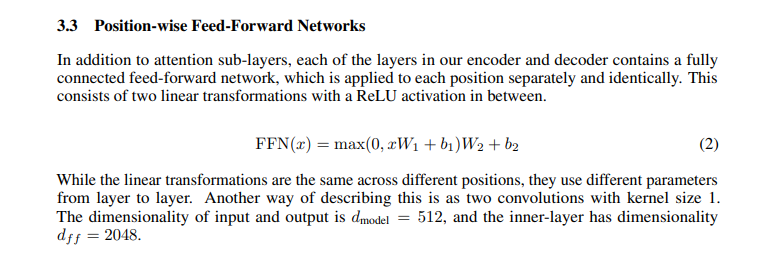

In [3]:
class FeedForwardBlock(nn.Module):
    
    def __init__(self, 
                 d_model: int,  # dimension of input 512 
                 d_ff:int, # output inner-layer has dimensionality 
                 dropout:float) -> None:
        super().__init__()
        self.linear_1 = nn.Linear(d_model,  # input layer 
                                  d_ff)  # output layer of inner-dimension
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(d_ff,    # input layer of inner-dimension
                                  d_model)  # output layer of inner-dimension
        
        
    def forward(self, x):
        # (batch, seq_len, d_model) -> (batch, seq_len, d_ff) --> (batch, seq_len, d_model)
        # linear_2 input layer or usme dropout and activation function relu hai or uske bad layer_1 kaam kar kar hai 
        return self.linear_2(self.dropout(torch.relu(self.linear_1(x))))

### 0.5 MultiHeadAttention

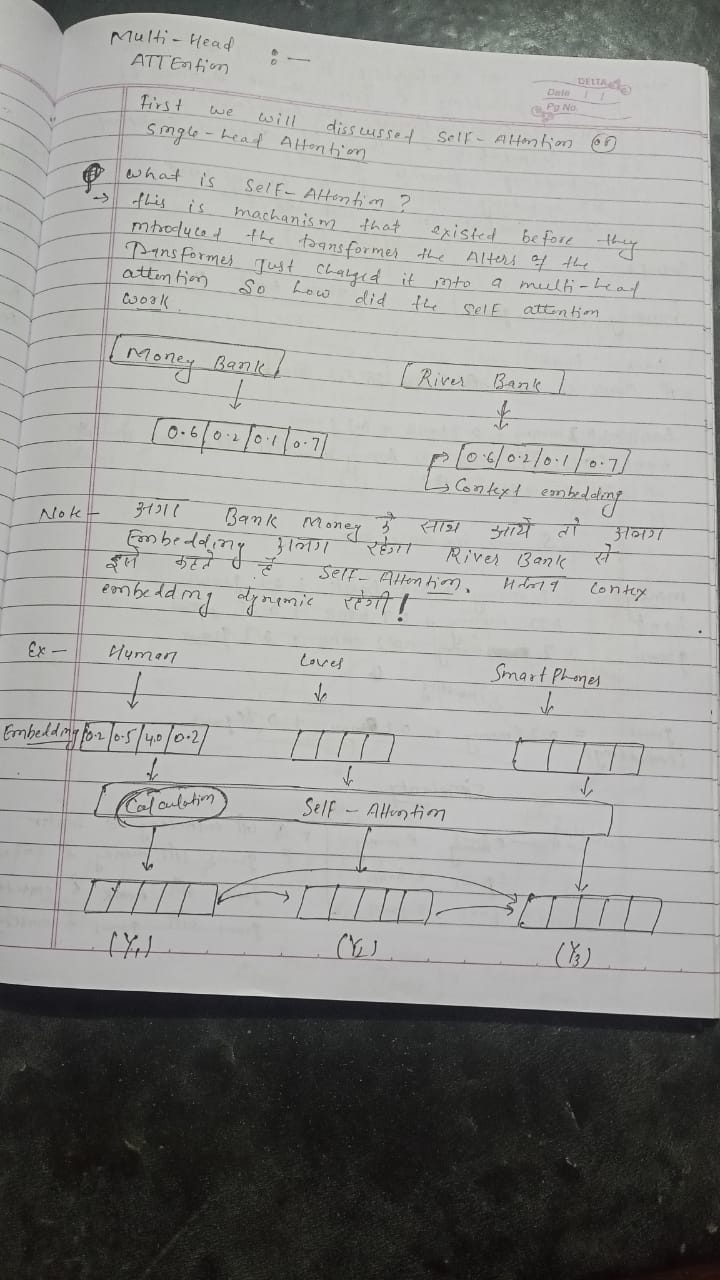
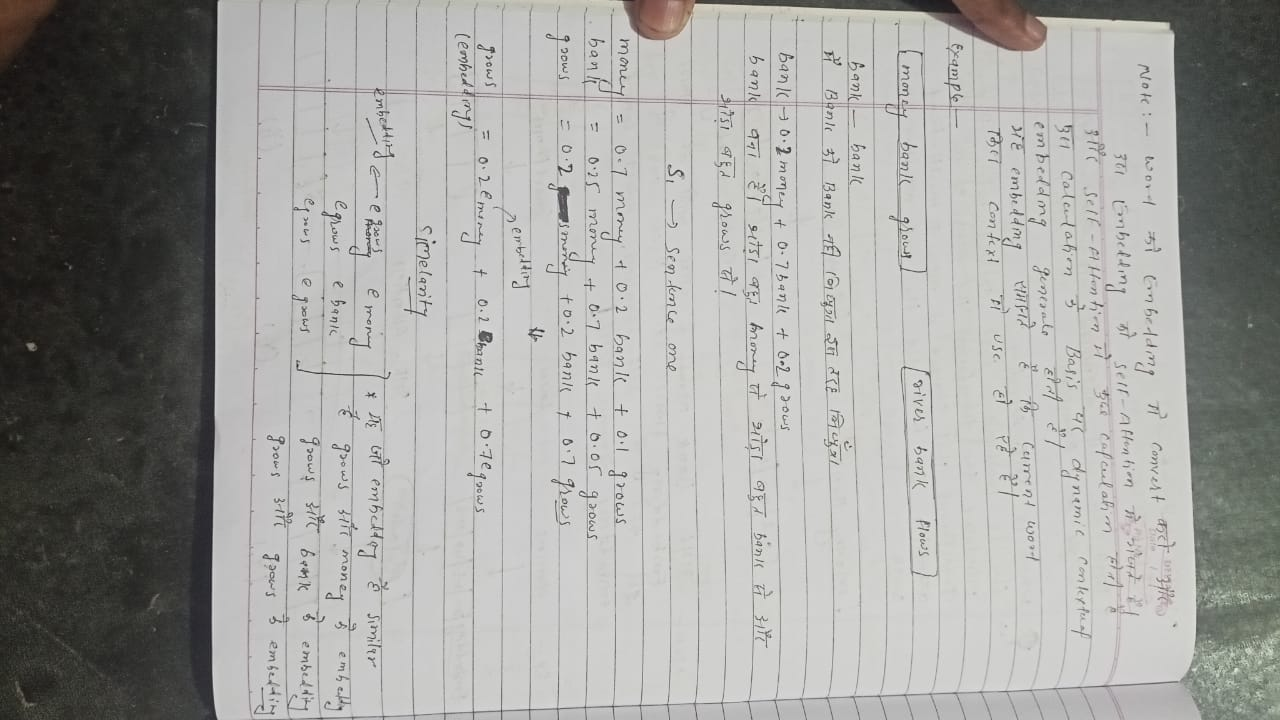
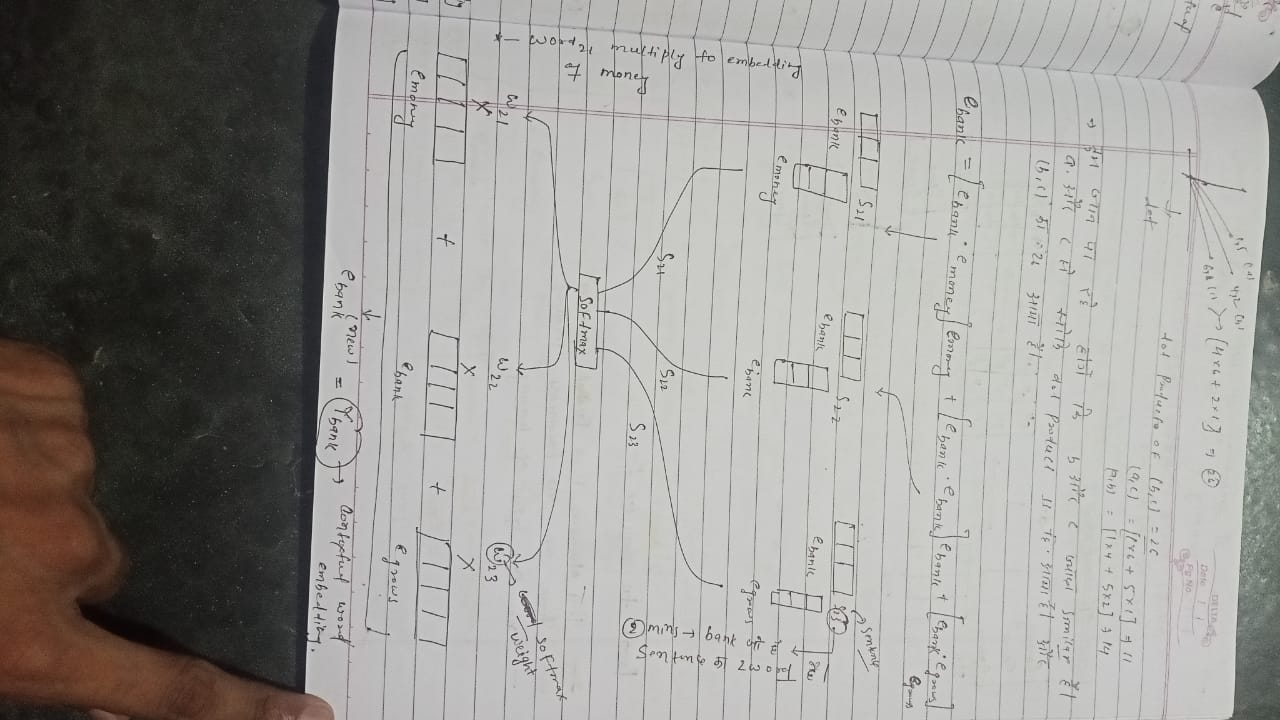
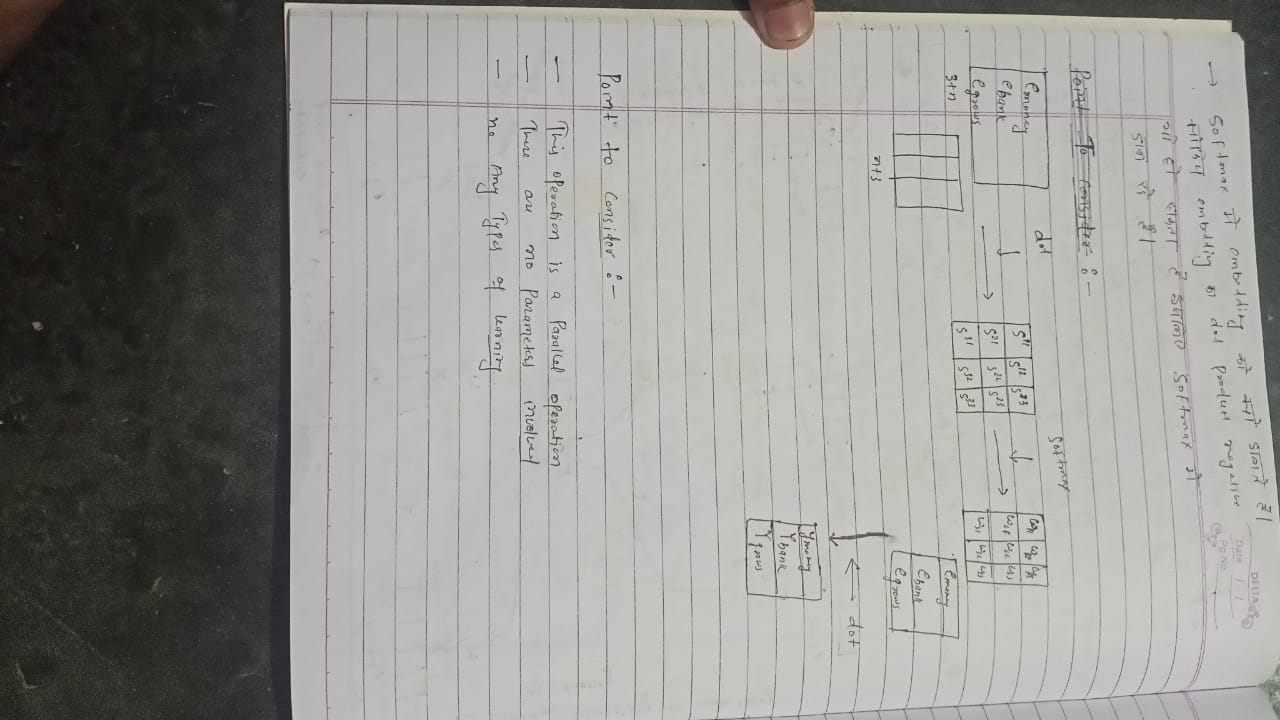
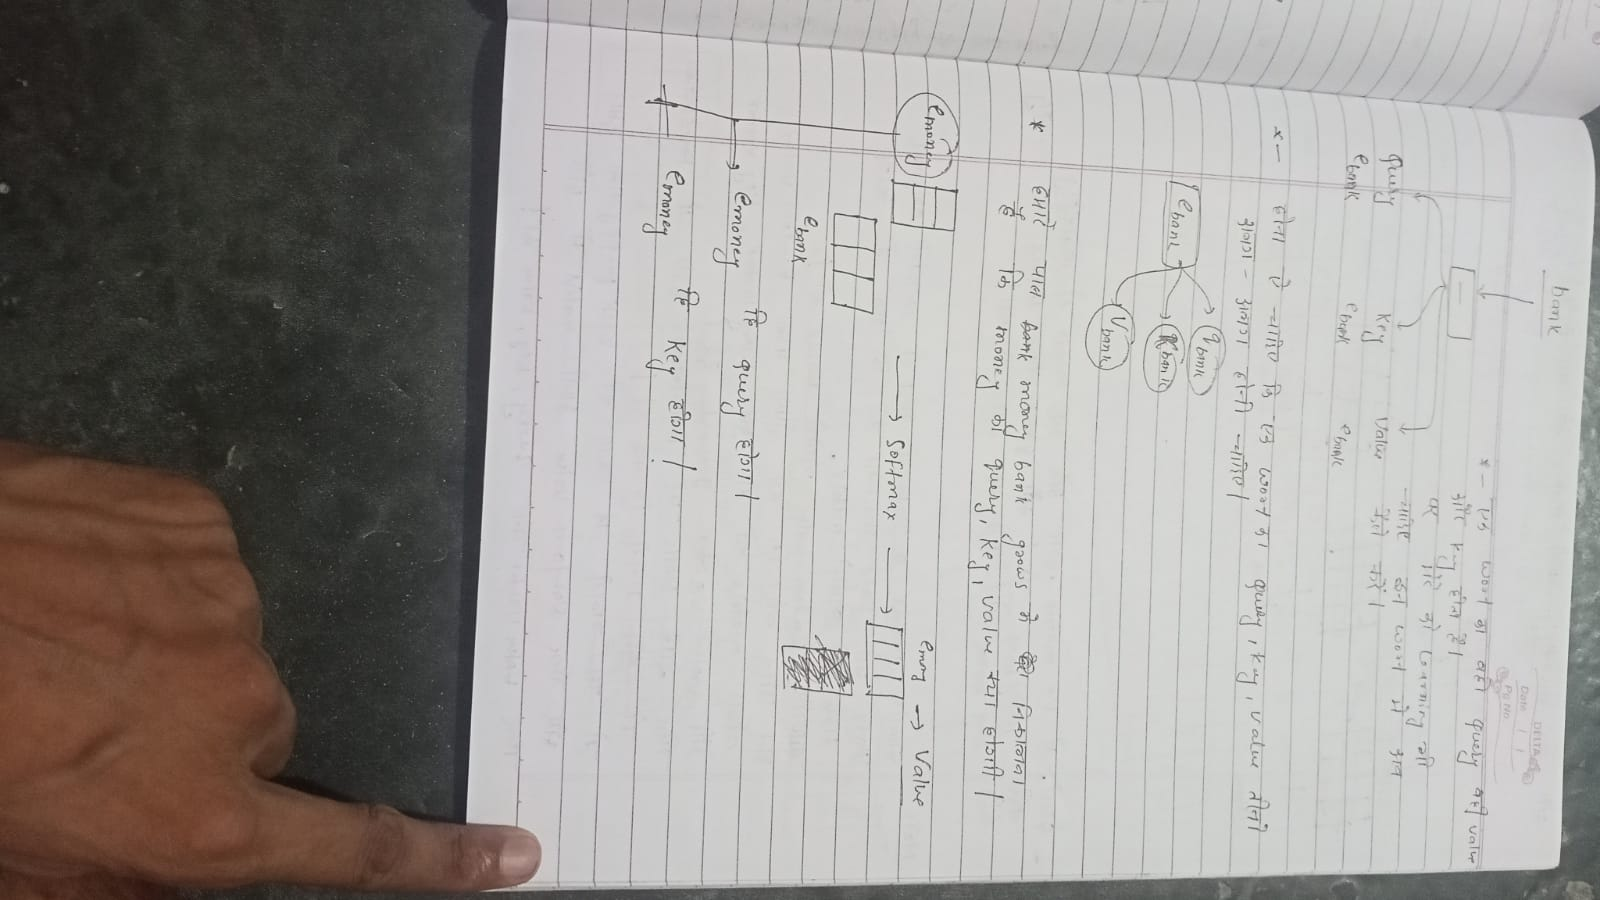
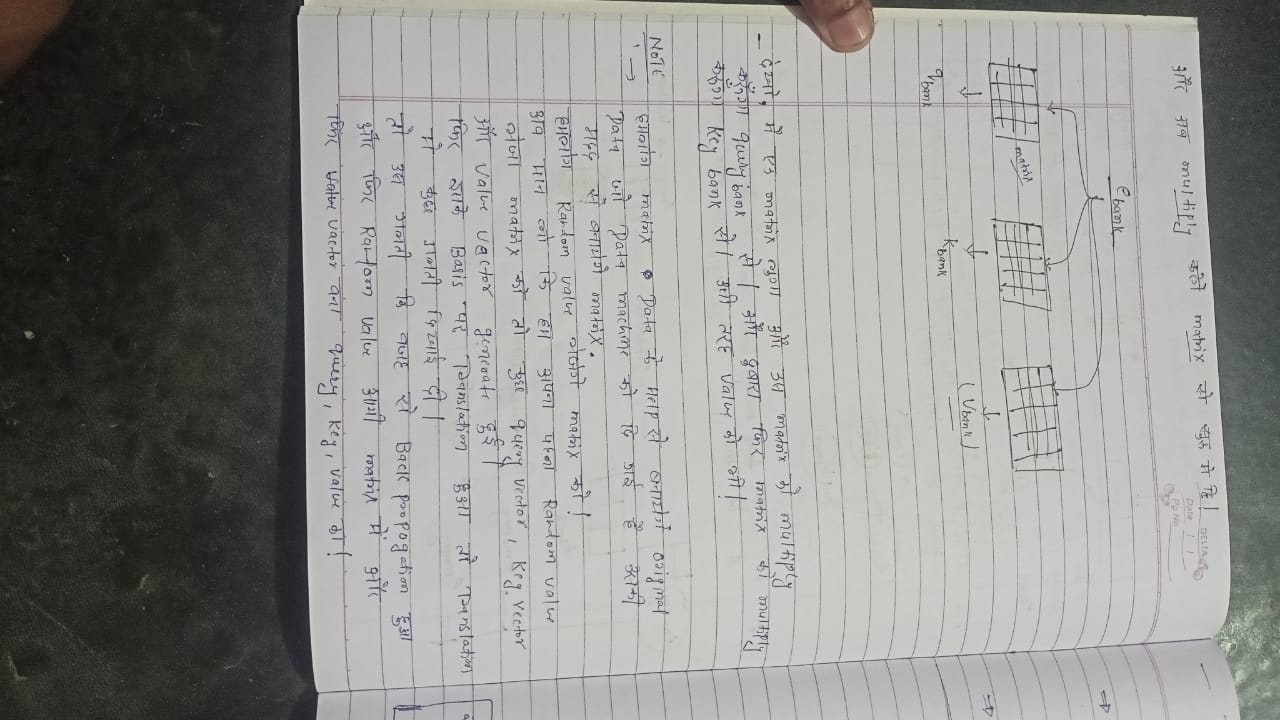
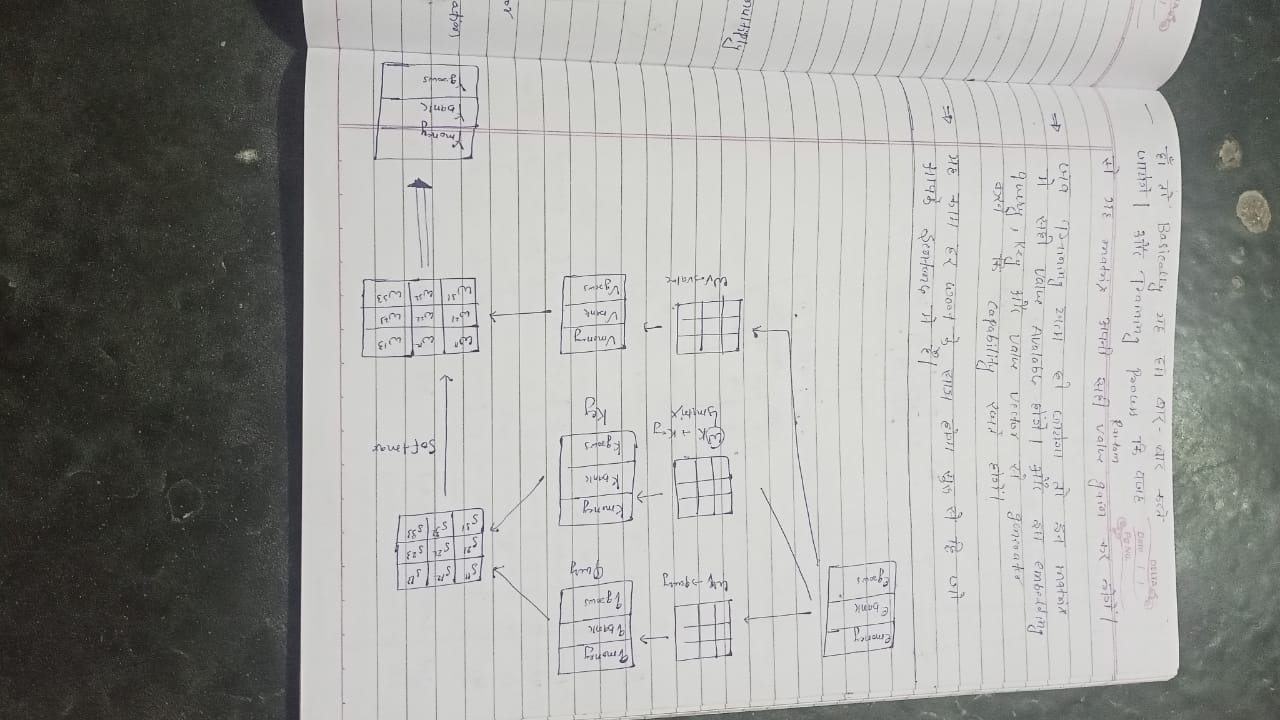
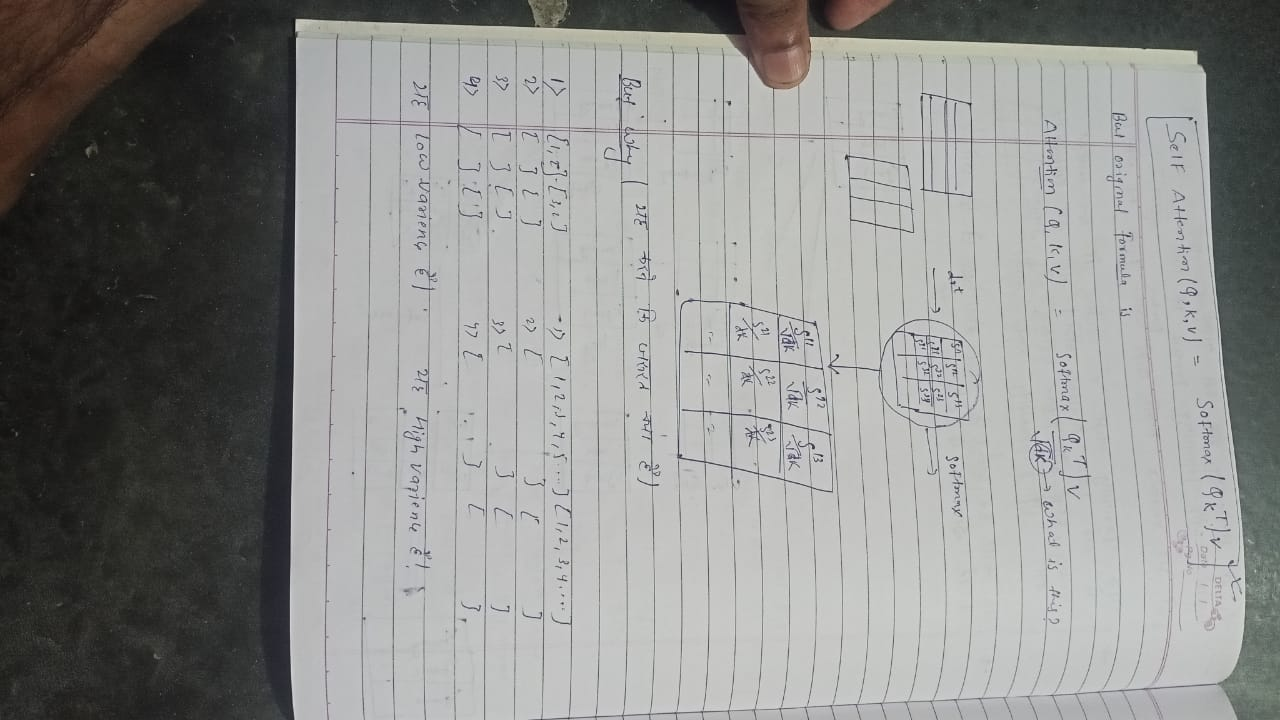



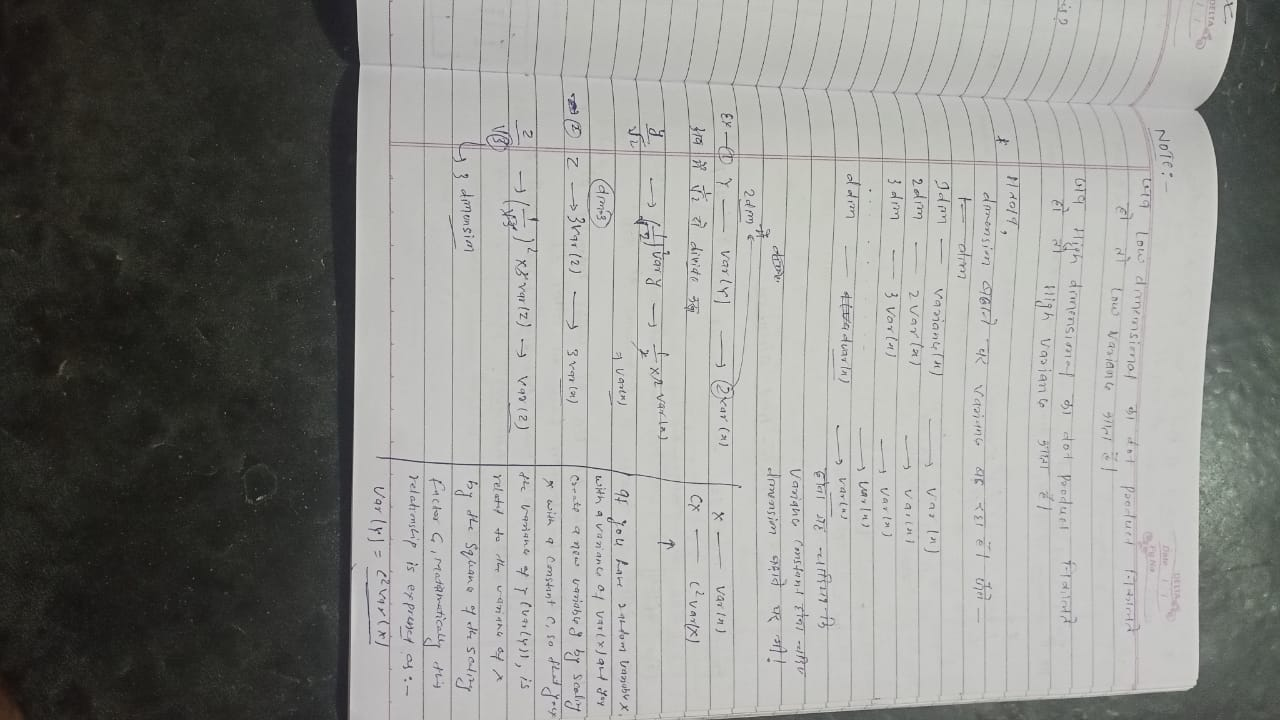
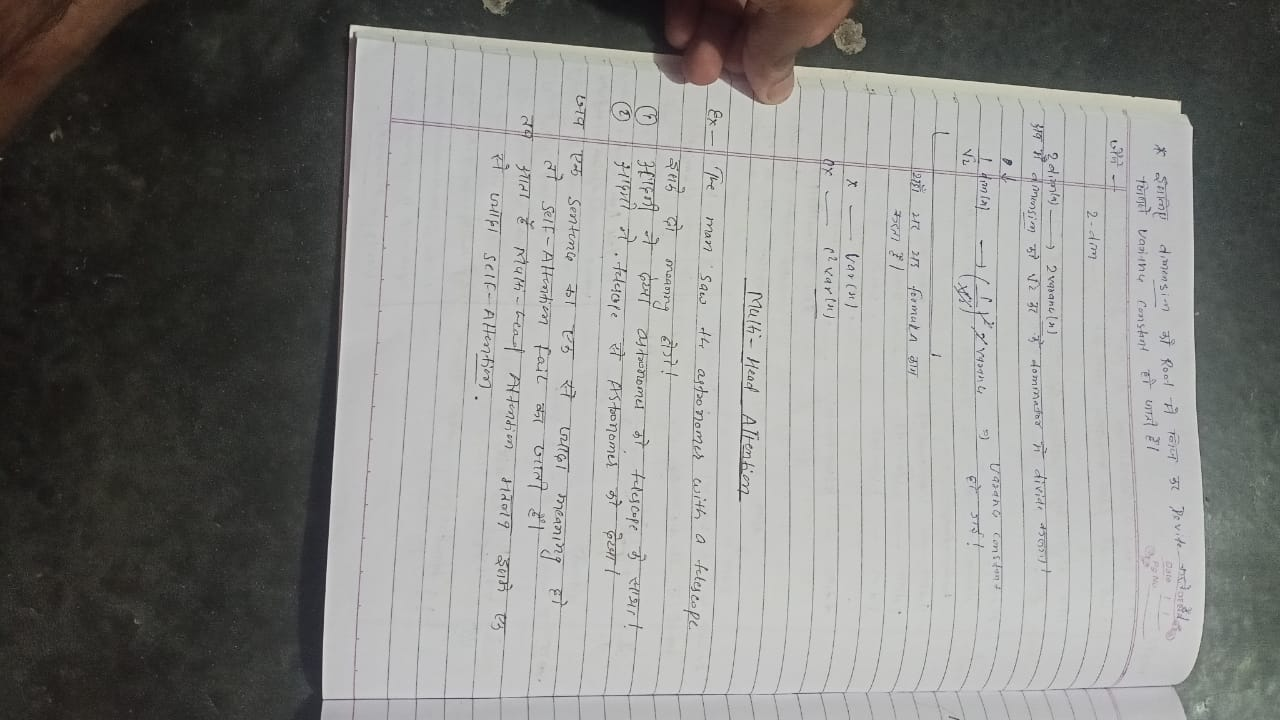

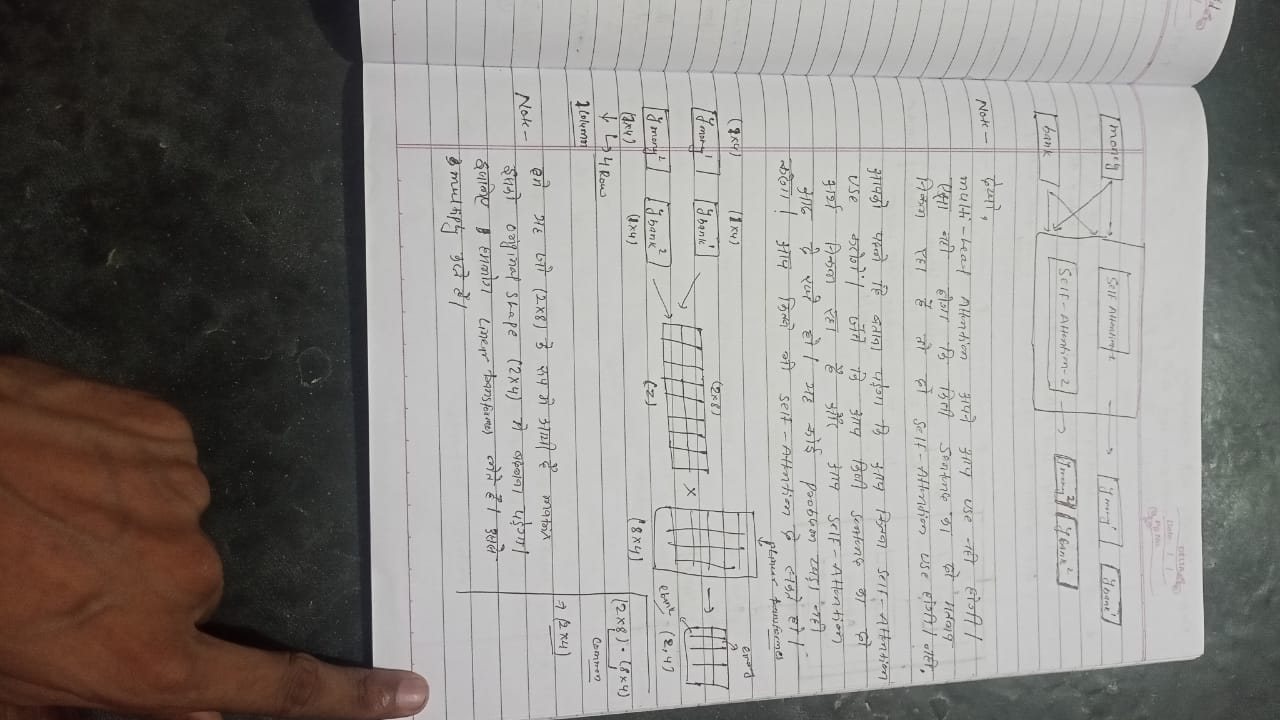
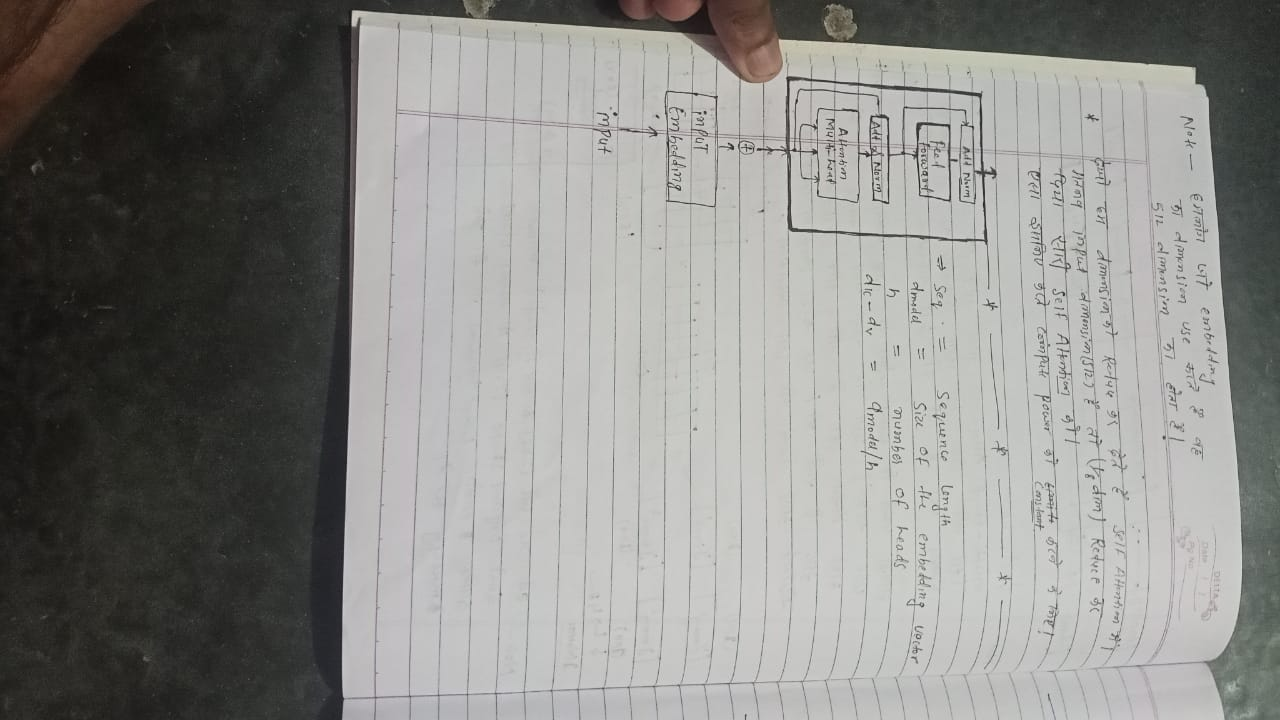




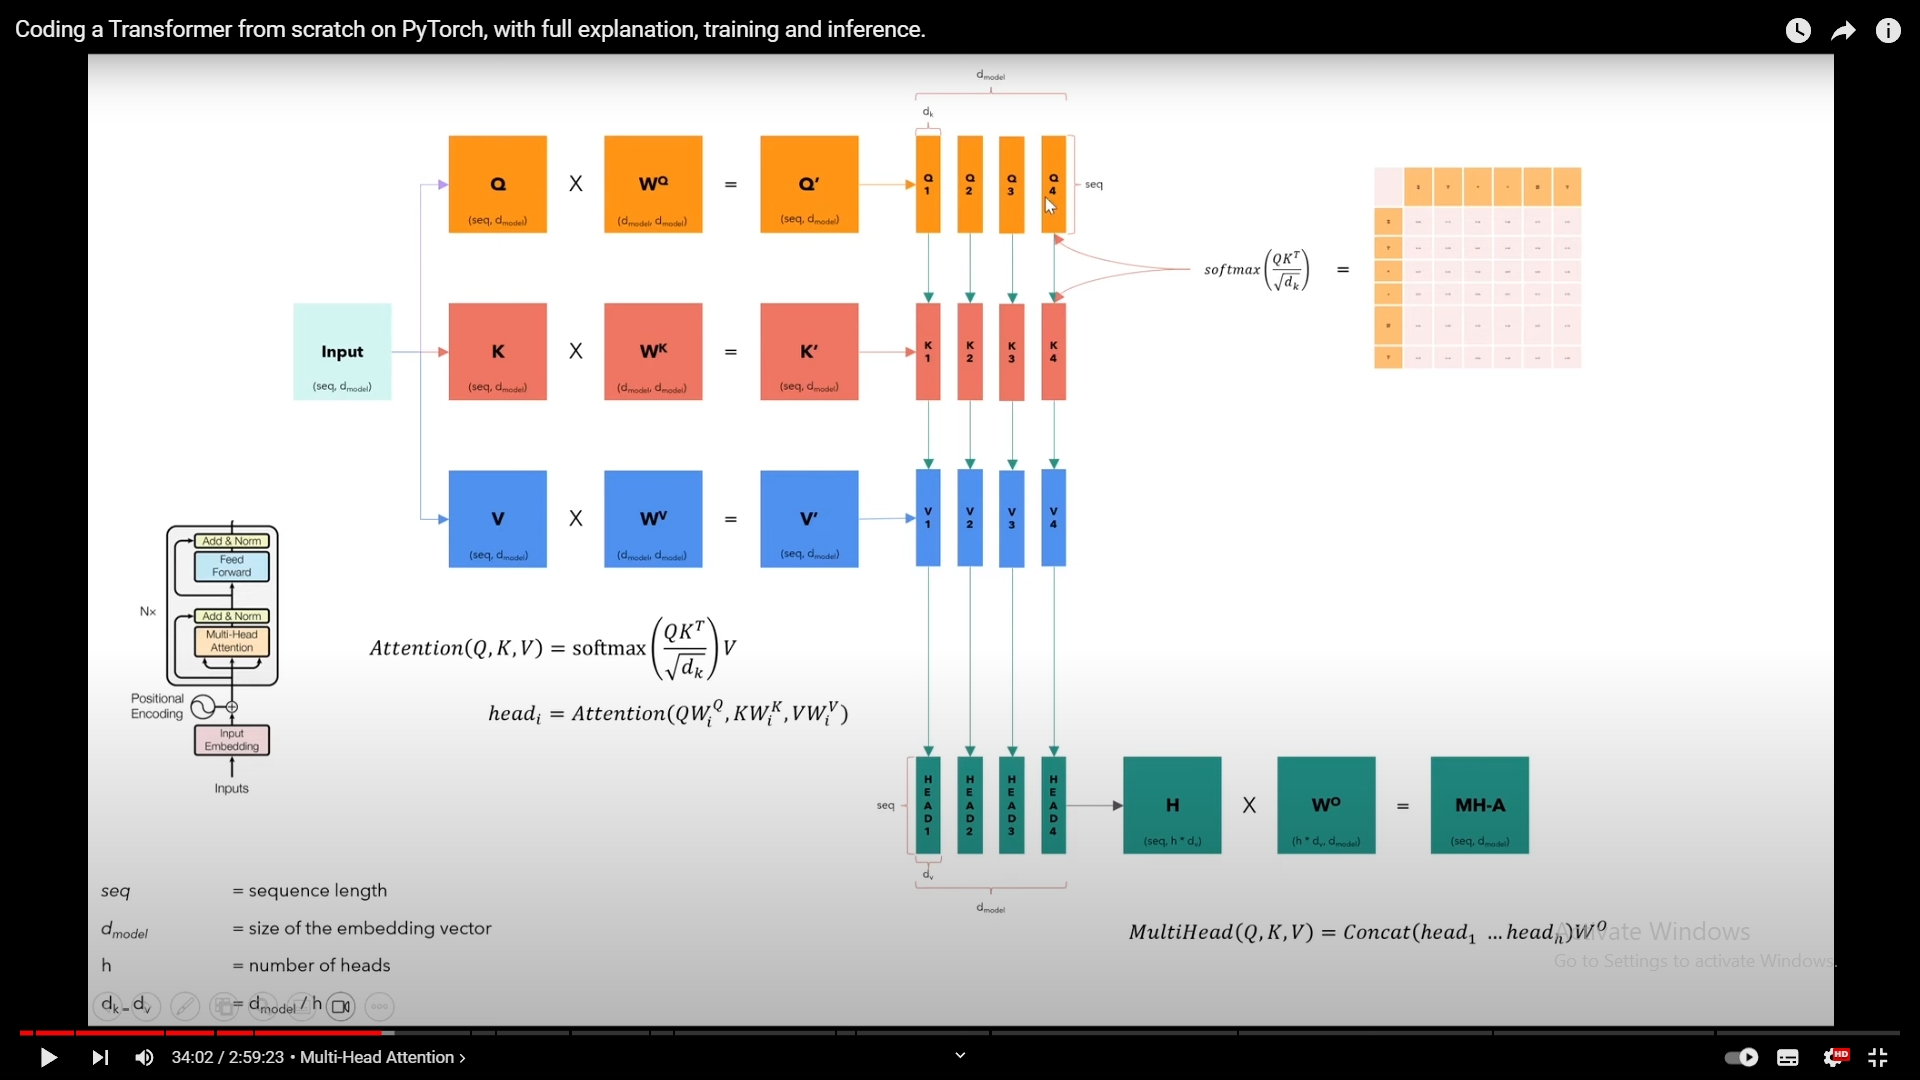
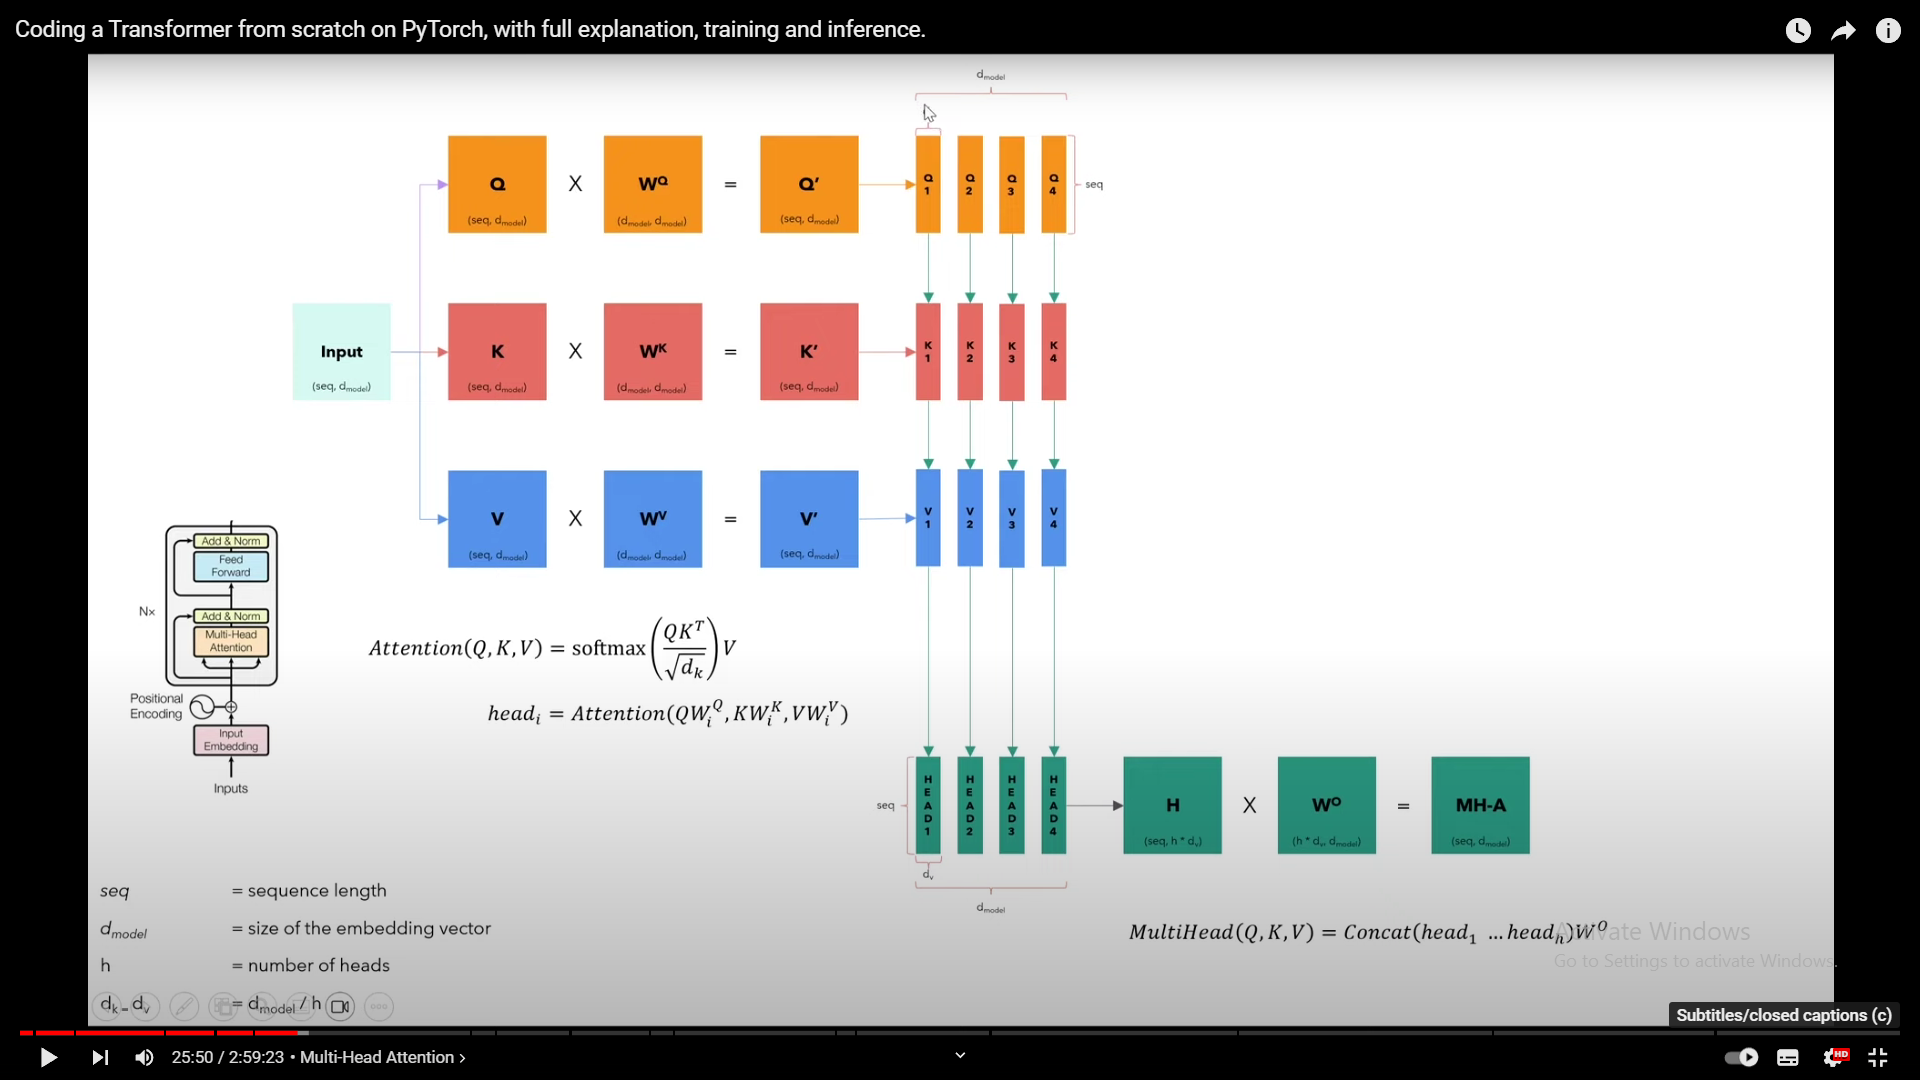

class MultiHeadAttentionBlock(nn.Module):
    
    def __init__(self, 
                 d_model:int,  # input dimension 512 
                 h:int,        # number of heades 
                 dropout:float
                 ) -> None:
        super().__init__()
        self.d_model = d_model 
        self.h = h 
        # make sure d_model is divisible by h 
        # otherwise we cannot divide equally the same vector representing  the embedding into equal matrices for each head 
        # The line assert d_model % h == 0 is an assertion statement. It checks if d_model is divisible by h without leaving a remainder. The % operator calculates the remainder of the division of d_model by h.
        # If d_model is divisible by h (remainder is 0), the program continues without any interruption.
        # If d_model is not divisible by h (remainder is not 0), the assertion fails, and the program raises an AssertionError with the message “d_model is not divisible by h”.
        # This check is crucial in the context of neural networks like the Transformer, where the embedding vector needs to be split evenly across multiple heads. If d_model isn’t divisible by h, the vector can’t be split evenly, and the model won’t function as intended. The assertion ensures that the programmer is aware of this requirement and addresses it accordingly.
        assert d_model % h == 0, "d_model is not divisible by h"
        
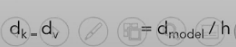
        self.d_k = d_model // h 
        
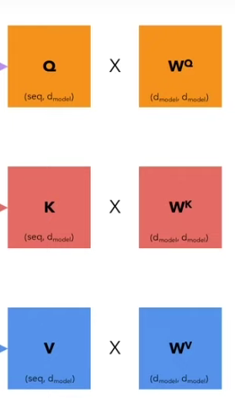

        self.w_q = nn.Linear(d_model, d_model, bias=False) # query 
        self.w_k = nn.Linear(d_model, d_model, bias=False)  # key 
        self.w_v = nn.Linear(d_model, d_model, bias=False)  # value
        
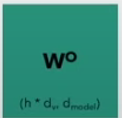

        # h = dk, dv and dk means d_model
        self.w_o = nn.Linear(d_model, d_model, bias=False)  # output


        
        self.dropout = nn.Dropout(dropout)
        
        

 @staticmethod  # you call this function without having an instance of you can just say multihead attention block dot attention instead of having an instance of this class 
def attention(query, key, value, mask, dropout:nn.Dropout):
        d_k = query.shape[-1]  # d_k is the last dimension of the query,key and the value 
        
        # just apply the formula from the paper 
        # (batch, h, seq_len, d_k) -> (batch,h, seq_len, seq_len)
        
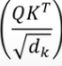

        # query matrix @ sign means matrix multiplication in pytorch 
        # if troanspose the last two dimensions minus one means transpose the last two dimensions so this will become the last dimension is the sequence length by d_k 
        attention_scores = (query @ key.transpose(-2, -1)) / math.sqrt(d_k) 
        # first we will apply the mask then apply the softmax 
        if mask is not None:
            # write a very low value (indicating -inf) to the positions where mask == 0 
            attention_scores.masked_fill_(mask==0,   # replace this value 
                                          -1e9)      # to this value 
            # apply the softmax 
        attention_scores = attention_scores.softmax(dim=-1)  # (batch, h, seq_len, seq_len) -> Apply softmax
        if dropout is not None:
            attention_scores = dropout(attention_scores)
            # (batch, h, seq_len, seq_len) --> (batch, h, seq_h, d_k)
            # return attention scores which can be used for visualization 
            return (attention_scores @ value), attention_scores
        


    def forward(self, q, k, v,
                mask):   # if we want some words do not interact with other words, we mask them see this video: https://youtu.be/ISNdQcPhsts?t=1705 to https://youtu.be/ISNdQcPhsts?t=1778
        query = self.w_q(q)  # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        key = self.w_k(k)  # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        value = self.w_v(v)  # (batch, seq_len, d_model) --> (batch, seq_len, d_model) 
        
        
        
        
            #   [input]                     [query view content]         [query transpose]
        # (batch, seq_len, d_model) --> (batch, seq_len, h, d_k) --> (batch, h, seq_len, d_k) means input me pahle (batch,seq_len, d_model) ayega uske baad jo view me hai usme (batch, seq_len, h, d_k) ayega or transpose me (batch, h, seq_len, d_k )
        # we want to divide this query,key and value into smaller matrices so that we can get give each small matrix to a different head 
        # view methods of pytorch which means that we keep the batch dimension because we don't want to split the sentence we want to split the embedding into H parts 

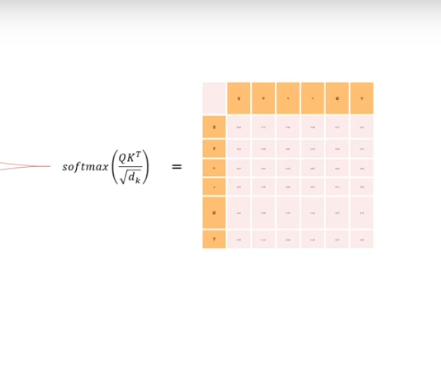

        query = query.view(
            query.shape[0],
            query[1],  # we also want to keep the second dimension which is the sequence because we don't want to split it 
            self.h,self.d_k   # third dimension so the d_model we want to split it into two smaller dimension which is H by d_k, self.h, self.dk
            ).transpose(1, 2)  # why do we transpose because we prefer to have the edge dimension insted of being the third dimension we want it to be the second dimension 
        key = key.view(key.shape[0], key.shape[1], self.h, self.d_k).transpose(1, 2)
        value = value.view(value.shape[0], value.shape[1], self.h, self.d_k).transpose(1, 2)
        




        
        # calculation attention 
        x, self.attention_scores = MultiHeadAttentionBlock.attention(query, key, value, mask, self.dropout)
        
        # combine all the heads together 
        # (batch, h, seq_len, d_k) --. (batch, seq_len, h, d_k) --> (batch, seq_len, d_model)

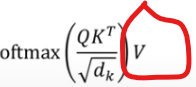

        # we transpose because before we transform the matrix into sequence length we had the sequence length as the third dimension we wanted back in the first place to combine them because the resulting tensor we want the sequence length to be in the second position 
        # contiguous means the pytorch to the transform the shape of the tensor needs to put the memory to be contiguous so he can just do it in place 
        x = x.transpose(1, 2).contiguous().view(x.shape[0], -1, self.h * self.d_k)
        







        # multiply by wo 
        # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        return self.w_o(x)  # this is the output matrix 

In [ ]:
class MultiHeadAttentionBlock(nn.Module):
    
    def __init__(self, 
                 d_model:int,  # input dimension 512 
                 h:int,        # number of heades 
                 dropout:float
                 ) -> None:
        super().__init__()
        self.d_model = d_model 
        self.h = h 
        # make sure d_model is divisible by h 
        # otherwise we cannot divide equally the same vector representing  the embedding into equal matrices for each head 
        # The line assert d_model % h == 0 is an assertion statement. It checks if d_model is divisible by h without leaving a remainder. The % operator calculates the remainder of the division of d_model by h.
        # If d_model is divisible by h (remainder is 0), the program continues without any interruption.
        # If d_model is not divisible by h (remainder is not 0), the assertion fails, and the program raises an AssertionError with the message “d_model is not divisible by h”.
        # This check is crucial in the context of neural networks like the Transformer, where the embedding vector needs to be split evenly across multiple heads. If d_model isn’t divisible by h, the vector can’t be split evenly, and the model won’t function as intended. The assertion ensures that the programmer is aware of this requirement and addresses it accordingly.
        assert d_model % h == 0, "d_model is not divisible by h"
        
        self.d_k = d_model // h 
        self.w_q = nn.Linear(d_model, d_model, bias=False) 
        self.w_k = nn.Linear(d_model, d_model, bias=False)
        self.w_v = nn.Linear(d_model, d_model, bias=False)
        self.w_o = nn.Linear(d_model, d_model, bias=False)
        self.dropout = nn.Dropout(dropout)
        
        
        
    @staticmethod  # you call this function without having an instance of you can just say multihead attention block dot attention instead of having an instance of this class 
    def attention(query, key, value, mask, dropout:nn.Dropout):
        d_k = query.shape[-1]  # d_k is the last dimension of the query,key and the value 
        
        # just apply the formula from the paper 
        # (batch, h, seq_len, d_k) -> (batch,h, seq_len, seq_len)
        # Image/MultiHead-Attention/attention_score.png
        # query matrix @ sign means matrix multiplication in pytorch 
        # if troanspose the last two dimensions minus one means transpose the last two dimensions so this will become the last dimension is the sequence length by d_k 
        attention_scores = (query @ key.transpose(-2, -1)) / math.sqrt(d_k) 
        # first we will apply the mask then apply the softmax 
        if mask is not None:
            # write a very low value (indicating -inf) to the positions where mask == 0 
            attention_scores.masked_fill_(mask==0,   # replace this value 
                                          -1e9)      # to this value 
            # apply the softmax 
        attention_scores = attention_scores.softmax(dim=-1)  # (batch, h, seq_len, seq_len) -> Apply softmax
        if dropout is not None:
            attention_scores = dropout(attention_scores)
            # (batch, h, seq_len, seq_len) --> (batch, h, seq_h, d_k)
            # return attention scores which can be used for visualization 
            return (attention_scores @ value), attention_scores
        
        
        
        
        
    def forward(self, q, k, v,
                mask):   # if we want some words do not interact with other words, we mask them see this video: https://youtu.be/ISNdQcPhsts?t=1705 to https://youtu.be/ISNdQcPhsts?t=1778
        query = self.w_q(q)  # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        key = self.w_k(k)  # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        value = self.w_v(v)  # (batch, seq_len, d_model) --> (batch, seq_len, d_model) 
        
        
        
        
            #   [input]                     [query view content]         [query transpose]
        # (batch, seq_len, d_model) --> (batch, seq_len, h, d_k) --> (batch, h, seq_len, d_k) means input me pahle (batch,seq_len, d_model) ayega uske baad jo view me hai usme (batch, seq_len, h, d_k) ayega or transpose me (batch, h, seq_len, d_k )
        # we want to divide this query,key and value into smaller matrices so that we can get give each small matrix to a different head 
        # view methods of pytorch which means that we keep the batch dimension because we don't want to split the sentence we want to split the embedding into H parts 
        # Image/MultiHead-Attention/softmax.png
        query = query.view(
            query.shape[0],
            query[1],  # we also want to keep the second dimension which is the sequence because we don't want to split it 
            self.h,self.d_k   # third dimension so the d_model we want to split it into two smaller dimension which is H by d_k, self.h, self.dk
            ).transpose(1, 2)  # why do we transpose because we prefer to have the edge dimension insted of being the third dimension we want it to be the second dimension 
        key = key.view(key.shape[0], key.shape[1], self.h, self.d_k).transpose(1, 2)
        value = value.view(value.shape[0], value.shape[1], self.h, self.d_k).transpose(1, 2)
        
        # calculation attention 
        x, self.attention_scores = MultiHeadAttentionBlock.attention(query, key, value, mask, self.dropout)
        
        # combine all the heads together 
        # (batch, h, seq_len, d_k) --. (batch, seq_len, h, d_k) --> (batch, seq_len, d_model)
        # Image/MultiHead-Attention/value_matrix.png
        # we transpose because before we transform the matrix into sequence length we had the sequence length as the third dimension we wanted back in the first place to combine them because the resulting tensor we want the sequence length to be in the second position 
        # contiguous means the pytorch to the transform the shape of the tensor needs to put the memory to be contiguous so he can just do it in place 
        x = x.transpose(1, 2).contiguous().view(x.shape[0], -1, self.h * self.d_k)
        
        # multiply by wo 
        # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        return self.w_o(x)  # this is the output matrix 
        
        
        
        

### 0.6 ResidualConnection

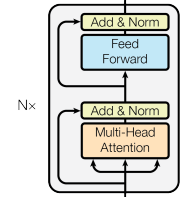

you see this image, one layer is skip that is Add and Norm

In [ ]:
class ResidualConnection(nn.Module):
    
    def __init__(self, features:int, dropout:float) -> None:
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        self.norm = LayerNormalization(features)
        
        
    def forward(self, x, sublayer):
        # first apply the normalization and then apply the sublayer
        return x + self.dropout(sublayer(self.norm(x)))  # output of the next layer is called sublayer
    
    

### 0.7 EncoderBlock

In [ ]:
class EncoderBlock(nn.Module):
    
    def __init__(self, features:int, self_attention_block:MultiHeadAttentionBlock, feed_forward_block:FeedForwardBlock, dropout:float) -> None:
        super().__init__()
        self.self_attention_block = self_attention_block
        self.feed_forward_block = feed_forward_block 
        self.residual_connections = nn.ModuleList # we use the model list which is a way to organize a list of modules in this case we need two of them 
        ([ResidualConnection(features, dropout) for _ in range(2)])
        
        
        
    def forward(self, x, 
                src_mask):  # source mask is the mask that we want to apply to the input of the encoder why do we need a mask for the input of the encoder because they we want to hide the interaction of the padding word with other words we don't want the padding word to interact with other word 
        x = self.residual_connections[0]  # first skip connection is multiHeadAttention
        (x, # this is the first skip connection of the x 
         lambda x: self.self_attention_block(x, x, x, src_mask))  # query, key, value and mask 
        x = self.residual_connections[1]  # second skip connection is feed forward 
        (x,  # output of the previos layer 
         self.feed_forward_block)
        return x 
    
    

### 0.8 Encoder

In [ ]:
class Encoder(nn.Module):
    
    def __init__(self, features:int, 
                 layers:nn.ModuleList  # many layer so use the moduleList
                 ) -> None:
        super().__init__()
        self.layers = layers
        self.norm = LayerNormalization(features)
        
        
    def forward(self, x, mask):
        for layer in self.layers:  # apply the one layer of many layers
            x = layer(x, mask)    
        return self.norm(x)   # output of Encoder is normalization 

## 1. Decoder

### 1.1 DecoderBlock

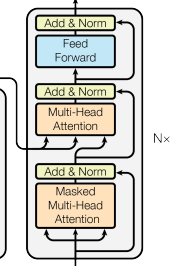

In [ ]:
class DecoderBlock(nn.Module):
    
    def __init__(self, 
                 features:int,
                 self_attention_block:MultiHeadAttentionBlock,
                 cross_attention_block:MultiHeadAttentionBlock,
                 feed_forward_block:FeedForwardBlock,
                 dropout
                 ) -> None:
        super().__init__()
        self.self_attention_block = self_attention_block # isme key, query, value all are comes in decoder 
        self.cross_attention_block = cross_attention_block  # query is comming from decoder and key and value commig from the encoder
        self.feed_forward_block = feed_forward_block   # feed forward network
        self.residual_connections = nn.ModuleList([ResidualConnection(features, dropout) for _ in range(3)])  # residual connection 
        
        
        
    def forward(self, x, encoder_output, 
                src_mask,   # source language is english because we will work in language model 
                tgt_mask):   # target language is french, etc
        x = self.residual_connections[0](x, lambda x:self.self_attention_block(x, x, x,  # key, query, value
                                                                               tgt_mask))  # with the mask of the decoder this is the self attention block of the decoder 
        x = self.residual_connections[1](x, lambda x:self.cross_attention_block(x,  # query comming from the decoder 
                                                                                encoder_output,  # key comming from the encoder
                                                                                encoder_output,   # value comming from the encoder
                                                                                src_mask))   # the mask of the encoder 
        x = self.residual_connections[2](x, self.feed_forward_block) # network block
        return x 
    


### 1.2 Decoder

In [ ]:
class Decoder(nn.Module):
    
    def __init__(self, features:int, 
                 layers:nn.ModuleList   # layers are too much so ModuleList
                 ) -> None:
        super().__init__()
        self.layers = layers
        self.norm = LayerNormalization(features)
        
    def forward(self,
                x,  # decoder block
                encoder_output, 
                src_mask,  # source language is english because we will work in language model 
                tgt_mask):   # target language is french, etc
        
        for layer in self.layers:
            x = layer(x, encoder_output, src_mask, tgt_mask)
        return self.norm(x)

### 1.3 ProjectionLayer

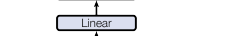

* the output of the multi-head attention is something that is sequence by d_model here we expact to have the outputs to be sequence by d_model if we don't consider the batch dimension however we want to map these words into the work back into the vocabulary so that's why we need this linear layer which will convert the embedding into a position of the vocabulary i will call this layer called the projected layer because it's projecting the embedding into the vocabulary

In [ ]:
class ProjectionLayer(nn.Module):
    
    def __init__(self, d_model, vocab_size) -> None:
        super().__init__()
        self.proj = nn.Linear(d_model, vocab_size)
        
        
    def forward(self, x) -> None:
        # (batch, seq_len, d_model) --> (batch, seq_len, vocab_size) # vocab_size means vocabulary size
        return self.proj(x)
    


### 1.4 Transformer

In [ ]:
class Transformer(nn.Module):
    
    def __init__(self,
                 encoder:Encoder,
                 decoder:Decoder,
                 src_embed:InputEmbeddings,  # input embedding of source language 
                 tgt_embed:InputEmbeddings,  # input embedding of target language 
                 src_pos:PositionalEncoding,  # positional encoding of source language
                 tgt_pos:PositionalEncoding,  # positional encoding of target language
                 projection_layer:ProjectionLayer   # linear layer 
                 ) -> None:
        super().__init__()
        self.encoder = encoder 
        self.decoder = decoder
        self.src_embed = src_embed 
        self.tgt_embed = tgt_embed 
        self.src_pos = src_pos 
        self.tgt_pos = tgt_pos
        self.tgt_projection_layer = projection_layer 
        
        
        
    # we will apply them in succession why we don't just build one forward method because as we will see during
    # inferencing we can reuse the output  of the encoder we don't need to calculated it every time and also 
    # we prefer to keep that this output seperate also for visualizing the attention
    def encode(self, 
               src,  # source 
               src_mask):  # source mask 
        # (batch, seq_len, d_model)
        src = self.src_embed(src)   # first we will apply the source embedding 
        src = self.src_pos(src)   # then apply the positional embedding 
        return self.encoder(src, src_mask)   # and then apply the encoder of sorce and sorce mask
    
    
    def decode(self, 
               encoder_output:torch.Tensor,    # output of the above encode function in tensor form 
               src_mask: torch.Tensor,    # source mask in tensor form
               tgt: torch.Tensor,         # target source in tensor form 
               tgt_mask:torch.Tensor      # target mask in tensor form 
               ):
        # (batch, seq_len, d_model)
        tgt = self.tgt_embed(tgt)   # first apply the target embedding of target sentence 
        tgt = self.tgt_pos(tgt)     # then apply the posional encoding of target sentence 
        return self.decoder(tgt, encoder_output, src_mask, tgt_mask)    # decode of targt sentence and encoder output, sorce mask, and target mask 
    
    def project(self, x):
        # (batch, seq_len, vocab_size)
        return self.projection_layer(x)    # apply the linear method 
        

### 1.5 Build Transformer

In [ ]:
def build_transformer(src_vocab_size:int,       # vocab size of the source and the target because we need to build the embedding because the embedding need to convert the from the token of the vocabulary into a vector of size 512, it needs to know how much public is the vocabulary so how many vectors 
                        tgt_vocab_size:int,    # taget vocal size 
                        src_seq_len:int,       # source sequence length, our source and target sequence length are same because we will deal with the language translation but they can also be different for example in cas you are using if transformer dealing with two very different languages for example for translation in which the tokens needed for the source language are much higher or much lower than the other ones so you don't need to keep the same length you can use different lengths 
                        tgt_seq_len:int,       # target sequcence lentgh 
                        d_model:int=512,    
                        N:int=6,                # number of layers so the number of encoder blocks and the number of decoder blocks 
                        h:int=8,                 # number of heads according the paper it is eight 
                        dropout:float=0.1,
                        d_ff:int=2048            # hidden layer dff of the feed forward layer as we saw in the paper 
                        ) -> Transformer:
    
    
    
    # create the embedding layers 
    src_embed = InputEmbeddings(d_model, src_vocab_size )    # in thource embedding inputEmbedding is d_model and source_vocab_size
    tgt_embed = InputEmbeddings(d_model, tgt_vocab_size)      # same to the target language 
    
    
    # create the positonal encoding layers 
    # we don't need to create two positional encoding layer because actually they do the same job they also don't add any parameter but because they have the dropout and also because i want to make it verbal so you can understand of each part without making any optimization 
    src_pos = PositionalEncoding(d_model, src_seq_len, dropout)   # src_seq_len = source sequence length 
    tgt_pos = PositionalEncoding(d_model, tgt_seq_len, dropout)
    
    
    # create the encoder blocks 
    encoder_blocks = []
    for _ in range(N):
        encoder_self_attention_block = MultiHeadAttentionBlock(d_model, h, dropout)   # in encoder block MultiHeadAttention input d_model and heads and dropout
        feed_forward_block = FeedForwardBlock(d_model, d_ff, dropout)    # input is d_model means (query, key, value) and d_ff means hidden layer and dropout
        encoder_block = EncoderBlock(d_model, encoder_self_attention_block, feed_forward_block,  dropout)   # EncoderBlock take three input d_model, multiHeadAttention, feedforward and dropout
        encoder_blocks.append(encoder_block)
        
        
    
    
    # create the decoder block 
    decoder_blocks = []
    for _ in range(N):
        decoder_self_attention_block = MultiHeadAttentionBlock(d_model, h, dropout)   # in decoder block first multiHeadAttention, input are d_model and number of heads and dropout 
        decoder_cross_attention_block = MultiHeadAttentionBlock(d_model, h, dropout)  # second multiHeadAttention, h: This is the number of heads in the multi-head attention mechanism. Each head computes an independent attention response, and the responses are then combined. This allows the model to capture different types of information from different parts of the input.
        feed_forward_block = FeedForwardBlock(d_model, d_ff, dropout)                 # d_ff means hidden layer 
        decoder_block = DecoderBlock(d_model,                               # query, key, value -> d_model 
                                     decoder_self_attention_block,          # first multiHeadAttention 
                                     decoder_cross_attention_block,         # second multHeadAttention 
                                     feed_forward_block,                    # hidden layer 
                                     dropout)   
        decoder_blocks.append(decoder_block)
        
        
    # create the encoder the decoder 
    encoder = Encoder(d_model, nn.ModuleList(encoder_blocks))       # nn.ModuleList -> many layer so use the moduleList
    decoder = Decoder(d_model, nn.ModuleList(decoder_blocks))
    
    
    
    # create the projection layer and this is linear layer take two input d_model and target_vocabulary_size 
    projection_layer = ProjectionLayer(
        d_model, 
        tgt_vocab_size)   # tgt_vocab_size: This parameter represents the target vocabulary size, which is the size of the output dimensionality. The projection layer will transform the input data into this space, which is typically the size of the vocabulary in a language model.
    
    
    # create the Transformer 
    transformer = Transformer(encoder,    
                              decoder, 
                              src_embed,    # source of embedding   encoder language
                              tgt_embed,    # target of embedding    decoder language
                              src_pos,       # source position means encoder language position 
                              tgt_pos,       # target position means decoder language position 
                              projection_layer)   # linear layer 
    
    
    # Initialize the parameters using the Xavier uniform thie is a way to initialize the parameter to make the training faster so they don't just start with random values 
    for p in transformer.parameters():
        if p.dim() > 1:     # transformer dimension is greater then one 
            nn.init.xavier_uniform_(p)   # initilize the xavier uniform 
            
            
    return transformer
    
        
        
        
 